# 1-this is a visual for train valid and test

## 1-1 this is for train analysis
the tensor in the real_data
info={     
                    "raw_data":data_tensor,[batch,100,2]\
                    "P_freqs":P_freqs,[51]\
                    "soft_freq_index":soft_freq_index,[batch,1,2]\
                    "soft_omega":soft_omega,[batch,freq_num,2]\
                    "epoch":epoch_omega,[epoch]\
                    “label_save”:label\
      }

In [6]:
epoch=1

In [7]:
epoch=1
string=f"{epoch}.pth"
train_process_path = '/liangaoming/conda_lam/expriments/paper1/expr1/expr1_100_data/train_process/omega_net/analysis_files/real_data_'+string
label_data_path="/liangaoming/conda_lam/neural_find_sol/ode_dataset/complex_center_dataset/"


In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import ast

plt.rcParams["font.family"] = "STIXGeneral"

In [9]:
Tensors_train_process=torch.load(train_process_path)
Tensors_train_process["label_save"]

FileNotFoundError: [Errno 2] No such file or directory: '/liangaoming/conda_lam/expriments/paper1/expr1/expr1_100_data/train_process/omega_net/analysis_files/real_data_1.pth'

In [10]:
Plot=Tensors_train_process["raw_data"]
real_label=Tensors_train_process['label_save'].cpu().numpy()
y1_data=Plot[:,:,0]
y2_data=Plot[:,:,1]
P_freq_data=Tensors_train_process["P_freqs"].cpu().numpy()
P_freq_list=P_freq_data.tolist()
data_t=np.linspace(0,2,100)
soft_freq_index=Tensors_train_process["soft_freq_index"].cpu().detach().numpy()
#freq——num
_,freq_num,_=soft_freq_index.shape

NameError: name 'Tensors_train_process' is not defined

In [5]:
#read dict_str 
#"sol_z1","sol_z2"
# input:label_number
# return:dict
def handle_str_2dict(label):


    csv=pd.read_csv(label_data_path+"data"+str(label)+".csv")
    column_z1=csv["sol_z1"][0]+"}"
    column_z2="{"+csv["sol_z2"][0]
    # ast.literal_eval() 
    try:
        column_z1 = ast.literal_eval(column_z1)
        column_z1 = {k: v.replace('z1=', '') for k, v in column_z1.items()}

        column_z2= ast.literal_eval(column_z2)
        column_z2=  {k: v.replace('z2=', '') for k, v in column_z2.items()}
        
        dict_sol={**column_z1,**column_z2}
        print(dict_sol)
    except (ValueError, SyntaxError):
        print("error")
    return dict_sol

In [6]:
import matplotlib as mpl
title_size=25
label_size=20
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = title_size

# 1.1 real_data omega analysis data

NameError: name 'real_label' is not defined

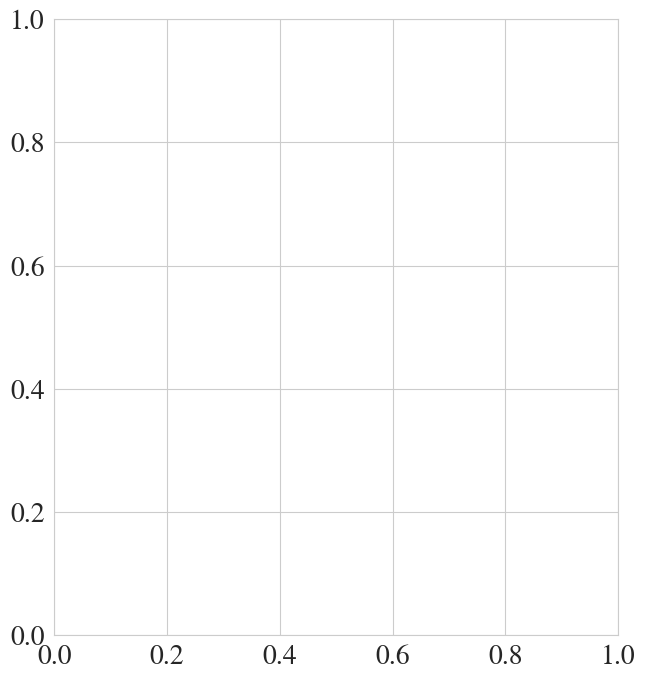

In [7]:

# Plotting
plt.figure(figsize=(16, 8))

import matplotlib as mpl
title_size=25
label_size=20
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = title_size


#time domain
for i in range(1):
    plt.subplot(1, 2, 1)
    plt.grid(True)
    real_label_index=real_label[i]
    dict_str=handle_str_2dict(real_label_index)
    plt.plot(data_t,y1_data[i].cpu().numpy(),label="$y_{1}=$"+dict_str["z1_solu"],lw=3,c='orange')
    plt.plot(data_t,y2_data[i].cpu().numpy(),label="$y_{2}=$"+dict_str["z2_solu"],lw=3,c="blue")
    plt.grid("True")
    plt.title('Time Domain Signal',fontsize=title_size,weight="bold")
    plt.legend(loc='upper left',fontsize=3*label_size/4)
    plt.xlabel('Time (s)',fontsize=label_size)
    plt.ylabel("Value",fontsize=label_size)
    current_axes = plt.gca()
    current_axes.patch.set_edgecolor('black')  
    current_axes.patch.set_linewidth(2)
    

    #fft

    fft_values1 = torch.fft.rfft(y1_data[i]).abs()
    fft_values2 = torch.fft.rfft(y2_data[i]).abs()
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.stem(np.arange(int(51)),fft_values1[:int(51)].cpu().numpy(),  markerfmt='orange')
    plt.stem(np.arange(int(51)), fft_values2[:int(51)].cpu().numpy(), markerfmt='bo')
    
    _,freq_indexs,_=soft_freq_index.shape
    print(freq_indexs)

    for j in range(freq_indexs):
        plt.axvline(soft_freq_index[i,j,0], color='orange', linestyle='-.',alpha=0.5,
                    label="$soft_{argmax}$ "+"$ y_{1}$"+f"={soft_freq_index[i,j,0]}"+f"freq_index={j}",linewidth=3)
        plt.axvline(soft_freq_index[i,j,1], color='blue', linestyle='-.',alpha=0.5,
                    label=r"$soft_{argmax}$ "+"$ y_{2}$"+f"={soft_freq_index[i,j,0]}"+f"freq_index={j}",linewidth=3)
    plt.title('Magnitude of FFT',fontsize=title_size,weight="bold")
    plt.xlabel('Frequency (Hz)',fontsize=label_size)
    plt.tight_layout()
   # plt.legend(loc='upper right',fontsize=label_size)
    plt.grid("True")
    current_axes = plt.gca()
    current_axes.patch.set_edgecolor('black')  
    current_axes.patch.set_linewidth(2)
    


    # 生成一些示例数据
    x =y1_data[i].cpu().numpy()
    y =y2_data[i].cpu().numpy()

    # 计算 KDE
    xmin, xmax =np.min(x),np.max(x)
    ymin, ymax =  np.min(y),np.max(y)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])

    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    # 创建子图
    fig = plt.figure(figsize=(8, 8.2))
    gs = fig.add_gridspec(4, 4)


    ax_joint = fig.add_subplot(gs[1:4, 0:3])
            
    ax_joint.grid(True)
    ax_marg_x = fig.add_subplot(gs[0, 0:4])
    ax_marg_x.grid(True)
    ax_marg_y = fig.add_subplot(gs[1:4, 3])
    ax_marg_y.grid(True)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    # 绘制二维 KDE 图
    contourf = ax_joint.contourf(X, Y, Z, levels=5, cmap="Blues")
    contour = ax_joint.contour(X, Y, Z, levels=5, colors='black',lw=3)
    ax_joint.set_title("Kernel density for real",weight="bold")
    plt.tight_layout()
    # 设置边框颜色和宽度
    plt.clabel(contour, inline=True, fontsize=15, fmt='%.e')
    ax_joint.patch.set_edgecolor('black')
    ax_joint.patch.set_linewidth(3)

    # 绘制 x 和 y 的一维分布
    ax_marg_x.hist(x, bins=100, density=True, range=(xmin, xmax),color='orange',
                   label="y1",
                   alpha=0.5)
    ax_marg_x.set_xlabel("y1",fontsize=label_size)
    ax_marg_x.set_ylabel("Mdf("+r"$y_{1}$)",fontsize=label_size)
    ax_marg_x.set_title("Distribution: y1",verticalalignment='center',fontsize=title_size,weight="bold")
    ax_marg_x.legend(fontsize='x-small',loc='upper left')  


    ax_marg_x.patch.set_edgecolor('black') 
    ax_marg_x.patch.set_linewidth(2)
    
    
    #kde
    kde_x = stats.gaussian_kde(x)
    x_range = np.linspace(xmin,xmax, 100)
    ax_marg_x.plot(x_range,kde_x(x_range), color='r',lw=3)



    ax_marg_y.hist(y, bins=100, density=True, range=(ymin, ymax),color='blue',
                   label="y2",
                   alpha=0.5, orientation='horizontal')
    ax_marg_y.set_xlabel("Mdf("+"$y_{2}$)",fontsize=label_size,rotation=0)
    ax_marg_y.xaxis.set_label_position("top")
    ax_marg_y.set_ylabel("y2",fontsize=label_size,rotation=270)
    ax_marg_y.legend(fontsize='x-small',loc='upper left')  # 
    
    # 添加 KDE 线

    kde_y = stats.gaussian_kde(y)
    y_range = np.linspace(ymin, ymax, 100)

    ax_marg_y.plot(kde_y(y_range), y_range, color='r',lw=3)

    # 手动添加旋转的标题
    ax_marg_y.text(1.05, 0.5, 'Distribution: y2',
                   transform=ax_marg_y.transAxes, 
                   rotation=270, verticalalignment='center',weight="bold",fontsize=title_size)


    ax_marg_y.patch.set_edgecolor('black') 
    ax_marg_y.patch.set_linewidth(2)



plt.show()



## 1.2 here we handle the loss visualization
loss visualize the train_loss and valid_Loss and test results
and we could handle the performace in the training the omega and data
#### train_process_directory="train_process/omega_net/tb_event/"
#### valid_process_u_directory="valid_process/omega_net/tb_event/valid_process_u_stat/"
#### valid_process_mse_directory="valid_process/omega_net/tb_event/valid_process_mse_loss/"
#### test_process_mse_directory="test_process/omega_net/tb_event/test_process_mse_loss/"
#### test_process_u_directory="test_process/omega_net/tb_event/test_process_u_stat/"


In [33]:
cimport matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
import os
import pandas as pd 
title_size=25
label_size=20
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = title_size

# search the files_info abput event 
train_process_directory="train_process/omega_net/tb_event/"
valid_process_u_directory="valid_process/omega_net/tb_event/valid_process_u_stat/"
valid_process_mse_directory="valid_process/omega_net/tb_event/valid_process_mse_loss/"
test_process_mse_directory="test_process/omega_net/tb_event/test_process_mse_loss/"
test_process_u_directory="test_process/omega_net/tb_event/test_process_u_stat/"
from tensorboard.backend.event_processing import event_accumulator



## here we read the config.csv to read the parameters to a dict
config_csv="csv/config.csv"

In [11]:
config_csv="csv/config.csv"
config= pd.read_csv(config_csv)
config_name=config.loc[:,'Unnamed: 0']
config_para=config.loc[:,'0']

In [12]:
config_dict={str(key):value for key,value in zip(config_name,config_para)}

In [13]:
def search_files_info(directory_path="train_process/omega_net/tb_event"):
    '''
    params: input:path 
    return list of name
    '''
    # List all files in the directory
    file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    print(file_names)
    return file_names

In [14]:
def plot_heat_tensor_change( tensor_loss_dict,epochs):

    

    #get the batch size
    gradient_loss=tensor_loss_dict[].cpu().detach().numpy()
    ini_loss=ini_loss.cpu().detach().numpy()
    score_fake_out=score_fake_out.cpu().detach().numpy()
    generator_loss=generator_all_loss.cpu().detach().numpy()

    #prepare the plot
    #fill
    generator_numpy[0,now_epoch]=   gradient_loss #
    generator_numpy[1, now_epoch] = ini_loss #
    generator_numpy[2,now_epoch] =  score_fake_out#
    generator_numpy[3,now_epoch] =  generator_all_loss#
    #plot the sub figure
    plt.figure(figsize=(8, 6))
    #note that the first dimension y axis is z1 and z2
    norm = colors.SymLogNorm(linthresh=1e-3, linscale=1, vmin=-1e-2, vmax=1e+2)
    plt.pcolor(generator_numpy, cmap='RdBu',norm=norm)
    cbar=plt.colorbar()
    cbar.set_label('Log Scale')

    plt.xlabel('Epoch', fontsize=22)
    # Set the y-axis ticks and labels to 1, 2 and rotate the labels
    y_positions = [0.5, 1.5, 2.5,3.5]
    y_labels = [r'$gradient_{loss}$', r'$ini_{loss}$',r'$score_{fake}$',r'$generator_{loss}$']
    plt.axhline(y=1, color='black', linewidth=2)
    plt.axhline(y=2, color='black', linewidth=2)
    plt.axhline(y=3, color='black', linewidth=2)
    plt.yticks(y_positions, y_labels, fontsize=22)
    # axis
    ax = plt.gca()

    # spines
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)  # 可以调整线的宽度

    # Set the y-axis tick parameters to hide the tick marks and set the tick label size
    plt.gca().yaxis.set_tick_params(size=0)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)

    plt.title("genertor dynamic response", fontsize=22)

    plt.tight_layout()
    plt.savefig(plot_path + "/generator_loss.png")

SyntaxError: invalid syntax (1511997842.py, line 6)

## here we plot loss and value in the differnt process with the epoch 
1.train_loss\
2.valid_loss\
3.test_result\
4.some record values\
func:event_list_path=search_files_info(test_process_mse_directory)

In [ ]:
#load your models from tb 
event_list_path=search_files_info(test_process_mse_directory)
epoch_step=5

name_4value={"train_process":train_process_directory,
             "valid_u":valid_process_u_directory,"valid_mse":valid_process_mse_directory,
            "test_u":test_process_u_directory,"test_mse":test_process_mse_directory}


dict_loss={"train_process":[],
           "valid_u":[],"valid_mse":[],
           "test_mse":[],"test_u":[]}


In [ ]:
name_4value.keys()


In [ ]:

for i, key in enumerate(name_4value.keys()):
    #load tensorboard
    print(key)
   
    event_list_path=search_files_info(name_4value[key])
    ea=event_accumulator.EventAccumulator(name_4value[key]+event_list_path[0]) 
    ea.Reload()
    print(ea.scalars.Keys())
    name=ea.scalars.Keys()[0]
    steps=len(ea.scalars.Items(name)) 
    print(steps)

    loss_array=[]
    for i in range (steps):
        dict_loss[key].append(ea.scalars.Items(name)[i].value) 


In [ ]:
dict_loss['test_mse'] 

In [ ]:
dict_loss['test_u'] 

In [ ]:
#plot for the loss

fig,ax=plt.subplots(figsize=(16,8))
for key,value in dict_loss.items():


    if  key == "test_mse" or key=="test_u":
        continue
        
    else:
        ax.plot(np.log10(dict_loss[key]),label="$log"+"_{10}$"+key)

   
        

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2)

# 显示图形
ax.legend(loc="upper right")
ax.set_title("Loss")
plt.grid(True)
plt.show()